In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load in our previously cleaned data...

In [3]:
clean = pd.read_csv('/content/drive/MyDrive/UW/sphscAudiogram/audiogram_clean.csv')

Again, take a look at what columns we have.

In [4]:
clean.columns

Index(['AGE', 'GENDER', 'R250', 'R500', 'R1000', 'R2000', 'R3000', 'R4000',
       'R6000', 'R8000', 'RPTA3', 'RPTA4', 'L250', 'L500', 'L1000', 'L2000',
       'L3000', 'L4000', 'L6000', 'L8000', 'LPTA3', 'LPTA4', 'PTA3mean',
       'PTA4mean', 'Avg_250', 'Avg_500', 'Avg_1000', 'Avg_2000', 'Avg_3000',
       'Avg_4000', 'Avg_6000', 'Avg_8000'],
      dtype='object')

Get dummy encoding for the categorical variables.

In [5]:
gender_dummies = pd.get_dummies(clean['GENDER'], prefix='GENDER')

In [6]:
gender_dummies['GENDER_Female'] = gender_dummies['GENDER_Female'].astype(int)
gender_dummies['GENDER_Male'] = gender_dummies['GENDER_Male'].astype(int)

In [7]:
X = pd.concat([clean[['AGE', 'R250', 'R500', 'R1000', 'R2000', 'R3000', 'R4000',
       'R6000', 'R8000', 'L250', 'L500', 'L1000', 'L2000',
       'L3000', 'L4000', 'L6000', 'L8000']], gender_dummies], axis=1)

Check what X matrix is.

In [8]:
X

,AGE,R250,R500,R1000,R2000,R3000,R4000,R6000,R8000,L250,L500,L1000,L2000,L3000,L4000,L6000,L8000,GENDER_Female,GENDER_Male
0,52.0,0.0,0.0,5.0,15.0,10.0,0.0,5.0,15.0,0.0,0.0,5.0,15.0,20.0,5.0,5.0,15.0,0,1
1,60.8,25.0,35.0,40.0,30.0,35.0,40.0,55.0,40.0,40.0,30.0,35.0,30.0,25.0,30.0,30.0,45.0,1,0
2,68.1,35.0,30.0,35.0,40.0,55.0,60.0,70.0,80.0,15.0,15.0,15.0,5.0,35.0,45.0,50.0,85.0,1,0
3,47.7,10.0,20.0,5.0,15.0,10.0,15.0,25.0,15.0,15.0,5.0,0.0,15.0,15.0,20.0,35.0,15.0,1,0
4,65.8,45.0,45.0,40.0,45.0,60.0,70.0,95.0,95.0,40.0,35.0,30.0,40.0,45.0,55.0,100.0,95.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,72.4,10.0,15.0,15.0,20.0,35.0,30.0,65.0,70.0,25.0,30.0,20.0,15.0,15.0,40.0,75.0,95.0,1,0
262,61.5,10.0,15.0,10.0,5.0,20.0,25.0,15.0,20.0,10.0,20.0,15.0,10.0,20.0,25.0,15.0,20.0,0,1
263,79.6,20.0,25.0,30.0,30.0,35.0,40.0,50.0,65.0,20.0,40.0,25.0,25.0,30.0,40.0,45.0,50.0,1,0
264,45.9,15.0,5.0,15.0,20.0,20.0,25.0,30.0,35.0,15.0,15.0,10.0,10.0,15.0,15.0,30.0,35.0,0,1


Use scaler to scale our input.

In [10]:
scaler = StandardScaler()
scaler.fit(X)
scaled_df = scaler.transform(X)
scaled_df = pd.DataFrame(scaled_df, columns = X.columns)

## Full PCA

Fit pca with all components and transform the scaled dataframe.

In [11]:
pca = PCA(n_components=scaled_df.shape[1], random_state=0)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

In [13]:
pca_df = pd.DataFrame(pca_df)

Let's compute how much variance is explained by each pca component.

In [14]:
pca_variance = pca_df.var() / sum(pca_df.var())

In [15]:
pca_variance

,0
0,6.194335e-01
1,1.286621e-01
2,8.498296e-02
3,3.759155e-02
4,3.254439e-02
5,2.469686e-02
6,1.558716e-02
7,1.222857e-02
8,1.013320e-02
9,6.333868e-03


In [16]:
sum(pca.explained_variance_ratio_[:5])

0.9032144473045767

The first five pca already explains 90% of the variance.

We can also plot the cumulative variance to see.

In [17]:
cumsum = pd.concat([pd.Series([0]), pca_variance.cumsum()], ignore_index=True)

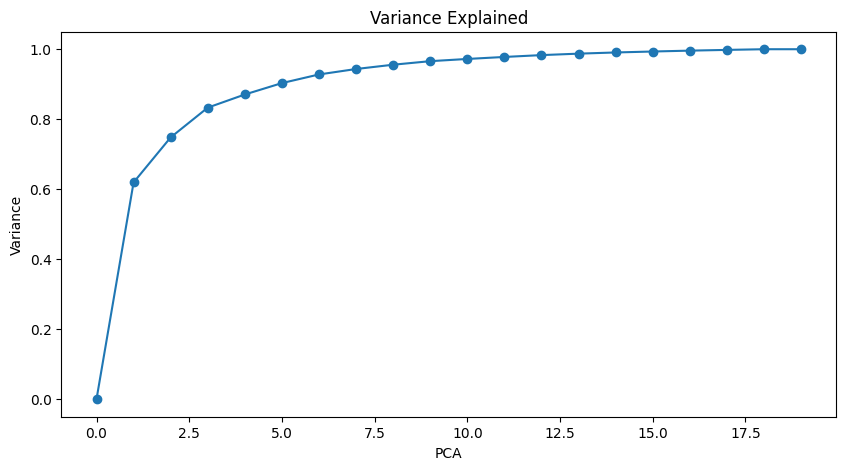

In [22]:
cumsum.plot(kind='line', style='-o', figsize=(10, 5))
plt.title('Variance Explained')
plt.xlabel('PCA')
plt.ylabel('Variance')

plt.show()

## Reduced PCA

Now let's reduce the number of pca components to 4.

In [23]:
pca_reduced = PCA(4, random_state=0)
pca_reduced.fit(scaled_df)
pca_reduced_df = pca_reduced.transform(scaled_df)

In [24]:
pca_reduced_df = pd.DataFrame(pca_reduced_df)

Transform the fitted pca dataframe back to the scaled df through inverse-transform, then transform this scaled df back to the scale of our original data.

In [25]:
pd.DataFrame(scaler.inverse_transform(pca_reduced.inverse_transform(pca_reduced_df)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,41.268269,-0.191617,-0.070437,3.853011,5.250759,10.817564,12.497663,11.357263,8.359114,0.703643,2.061832,5.196811,8.795360,14.941147,17.002479,16.959571,12.899170,0.068009,0.931991
1,61.628577,31.914305,35.408052,36.956867,33.530117,32.771754,33.863505,40.173800,44.012237,31.909456,34.086959,32.270535,31.049076,30.160199,33.555108,38.630238,43.968119,0.991707,0.008293
2,83.329292,26.356272,26.230781,26.040060,29.031485,37.680814,46.395003,62.823960,78.088712,24.907275,25.177138,22.978613,26.569289,35.869415,46.297254,60.060942,74.072505,0.981805,0.018195
3,52.574670,10.917735,11.249285,12.979698,11.396521,11.528456,13.422594,19.107076,22.893082,10.380491,10.340677,9.930878,10.373908,11.729242,15.288875,20.853770,24.907849,0.972177,0.027823
4,86.926424,40.957614,41.462829,39.579380,40.775793,57.010736,67.221868,81.538104,93.447592,40.506214,42.375130,38.204514,39.239204,53.645401,65.721891,76.175668,86.133042,-0.020037,1.020037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,82.741088,19.939214,18.597630,18.295806,22.360495,32.023640,41.632569,58.831931,75.149142,18.198133,17.655412,15.804006,20.277316,31.057751,42.156255,56.876423,71.361039,0.985593,0.014407
262,50.048088,13.070671,12.244695,12.411546,9.808987,17.378180,20.925603,23.955251,24.155190,13.201092,13.408979,11.805834,10.430642,17.597455,22.639711,25.070454,24.257537,0.004380,0.995620
263,72.429930,24.996253,26.678456,28.347133,30.056488,34.388408,39.527532,50.733936,60.558695,24.366428,25.812582,25.217504,28.463681,33.411122,40.160868,49.757766,59.422449,1.007149,-0.007149
264,52.463805,13.229522,12.398668,12.711190,11.015463,19.363363,23.497696,27.294236,28.439580,13.327710,13.651039,12.319218,11.782292,19.771794,25.290881,28.384076,28.324542,0.008436,0.991564


Compare it with the input dataframe X.

In [26]:
X

,AGE,R250,R500,R1000,R2000,R3000,R4000,R6000,R8000,L250,L500,L1000,L2000,L3000,L4000,L6000,L8000,GENDER_Female,GENDER_Male
0,52.0,0.0,0.0,5.0,15.0,10.0,0.0,5.0,15.0,0.0,0.0,5.0,15.0,20.0,5.0,5.0,15.0,0,1
1,60.8,25.0,35.0,40.0,30.0,35.0,40.0,55.0,40.0,40.0,30.0,35.0,30.0,25.0,30.0,30.0,45.0,1,0
2,68.1,35.0,30.0,35.0,40.0,55.0,60.0,70.0,80.0,15.0,15.0,15.0,5.0,35.0,45.0,50.0,85.0,1,0
3,47.7,10.0,20.0,5.0,15.0,10.0,15.0,25.0,15.0,15.0,5.0,0.0,15.0,15.0,20.0,35.0,15.0,1,0
4,65.8,45.0,45.0,40.0,45.0,60.0,70.0,95.0,95.0,40.0,35.0,30.0,40.0,45.0,55.0,100.0,95.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,72.4,10.0,15.0,15.0,20.0,35.0,30.0,65.0,70.0,25.0,30.0,20.0,15.0,15.0,40.0,75.0,95.0,1,0
262,61.5,10.0,15.0,10.0,5.0,20.0,25.0,15.0,20.0,10.0,20.0,15.0,10.0,20.0,25.0,15.0,20.0,0,1
263,79.6,20.0,25.0,30.0,30.0,35.0,40.0,50.0,65.0,20.0,40.0,25.0,25.0,30.0,40.0,45.0,50.0,1,0
264,45.9,15.0,5.0,15.0,20.0,20.0,25.0,30.0,35.0,15.0,15.0,10.0,10.0,15.0,15.0,30.0,35.0,0,1


We can see that the reduced dataframe is still somewhat close to the original data values.

Export X for later use.

In [27]:
X.to_csv('/content/drive/MyDrive/UW/sphscAudiogram/audiogram_x.csv', index=False)